In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [255]:
def convert(x):
    # Split the text into lines
    lines = x.strip().split('\n')
    # Extract the column names
    cols = lines[0].split()
    # Create a list of dictionaries with the data
    data = []
    for line in lines[1:]:
        values = line.split()
        data.append(dict(zip(cols, values)))
    # Create the DataFrame
    df = pd.DataFrame(data)
    # Convert the columns to numeric
    df = df.apply(pd.to_numeric, errors='ignore')
    return df

In [256]:
scores = {
    'als': {
        'movielens': {},
        'steam': {},
        'goodreads': {},
        'commerce': {}
    },
    'rbm': {
        'movielens': {},
        'steam': {},
        'goodreads': {},
        'commerce': {}
    },
    'ncf': {
        'movielens': {},
        'steam': {},
        'goodreads': {},
        'commerce': {}
    },
    'sasrec': {
        'movielens': {},
        'steam': {},
        'goodreads': {},
        'commerce': {}
    }
}

In [319]:
exc = """
TOP_K	MAP	NDCG	Precision	Recall
5	0.078012	0.103762	0.047054	0.131140
10	0.087442	0.123713	0.034842	0.187513
50	0.098070	0.168240	0.014011	0.357601
"""
inc = """
TOP_K	MAP	NDCG	Precision	Recall
5	0.109183	0.147078	0.065977	0.188638
10	0.120883	0.170874	0.048587	0.257138
50	0.134010	0.221311	0.019105	0.441678
"""
rat = """
"""
scores['sasrec']['commerce'] = {'exc': convert(exc), 'inc': convert(inc), 'rat': convert(rat)}

In [321]:
import pickle
# Save the dictionary to a file
with open('scores.pickle', 'wb') as f:
    pickle.dump(scores, f)
with open('scores.pickle', 'rb') as f:
    scores = pickle.load(f)

In [323]:
########################

<h1>Now do some charts and plots</h>

In [333]:
def percentage_of_baseline(df):
    def calc_percentage_improvement(row):
        als_base = row['als']
        for col in df.columns:
            row[col] = (row[col] / als_base - 0) * 100
        return row

    df = df.apply(calc_percentage_improvement, axis=1)
    return df

In [397]:
tmp_dfs = []
for dataset in ['movielens', 'steam', 'goodreads', 'commerce']:
    tmp = {}
    for algo, data in scores.items():
        tmp[algo] = data[dataset]['inc'].set_index('TOP_K')['Recall'].to_dict()
    tmp_dfs.append(pd.DataFrame().from_dict(tmp).loc[10])
x = pd.concat(tmp_dfs, axis=1)
x.columns = ['movielens', 'steam', 'goodreads', 'commerce']
np.round(x,3)

,movielens,steam,goodreads,commerce
als,0.018,0.016,0.002,0.052
rbm,0.069,0.165,0.089,0.082
ncf,0.040,0.229,0.078,0.267
sasrec,0.064,0.212,0.066,0.257


In [457]:
from tabulate import tabulate
# Create a new dictionary to hold reshaped data
reshaped_scores = []
for algo, datasets in scores.items():
    for dataset, df in datasets.items():
        for (index, exc), (index, inc) in zip(df['exc'].iterrows(), df['inc'].iterrows()):
            reshaped_scores.append({
                ('', 'Dataset'): dataset.capitalize(),
                ('', 'Algorithm'): algo.upper(),
                ('', 'TOP_K'): exc['TOP_K'],
                ('MAP', 'exc'): exc['MAP'],
                ('MAP', 'inc'): inc['MAP'],
                ('NDCG', 'exc'): exc['NDCG'],
                ('NDCG', 'inc'): inc['NDCG'],
                ('Precision', 'exc'): exc['Precision'],
                ('Precision', 'inc'): inc['Precision'],
                ('Recall', 'exc'): exc['Recall'],
                ('Recall', 'inc'): inc['Recall']
            })

# Create a DataFrame from reshaped data with MultiIndex columns
df_reshaped = pd.DataFrame(reshaped_scores)
df_reshaped.columns = pd.MultiIndex.from_tuples(df_reshaped.columns)
#df_reshaped = df_reshaped.sort_values(['Dataset', 'TOP_K'])
# Print table
#print(tabulate(df_reshaped, headers='keys', tablefmt='pretty'))
#df_reshaped.style.hide_index()

In [458]:
x = df_reshaped[df_reshaped[('', 'TOP_K')] == 50].drop(('', 'TOP_K'), axis=1).sort_values(('', 'Dataset'))
x.style.hide_index()

/var/folders/p5/jqpndw0d2cg7g0mst1n0c49r0000gn/T/ipykernel_57007/1532902427.py:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  x.style.hide_index()


In [405]:
scores['als']['movielens']['exc'].style.hide_index()

/var/folders/p5/jqpndw0d2cg7g0mst1n0c49r0000gn/T/ipykernel_57007/35421821.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  scores['als']['movielens']['exc'].style.hide_index()


TOP_K,MAP,NDCG,Precision,Recall
5,0.007502,0.060513,0.060233,0.014246
10,0.010069,0.060240,0.057794,0.026809
50,0.018716,0.081579,0.047784,0.102491


In [335]:
#############################################

In [336]:
def parse_rfm(text):
    data = []
    for line in text.split('\n'):
        parts = line.split(' ')
        if len(parts) >= 2:
            data.append({'Name': ' '.join(parts[:-1]), 'Value': float(parts[-1])})
    df = pd.DataFrame(data)
    return df

In [282]:
als = """
Can't Loose Them 0.0099
Champions 0.0068
Loyal 0.0081
Potential 0.0077
Sleeping 0.0154
Require Activation 0.0266
"""
rfm = """
Can't Loose Them 0.041
Champions 0.0466
Loyal 0.0373
Potential 0.0458
Sleeping 0.0544
Require Activation 0.0687
"""
ncf = """
Can't Loose Them 0.0468
Champions 0.0594
Loyal 0.0663
Potential 0.0819
Sleeping 0.0907
Require Activation 0.1509
"""
sasrec = """
Can't Loose Them 0.0879
Champions 0.0839
Loyal 0.1157
Potential 0.1155
Sleeping 0.1477
Require Activation 0.2003
"""
als = parse_rfm(als).set_index('Name')
rfm = parse_rfm(rfm).set_index('Name')
ncf = parse_rfm(ncf).set_index('Name')
sasrec = parse_rfm(sasrec).set_index('Name')

In [337]:
x = pd.concat((als, rfm, ncf, sasrec), axis=1)
x.columns=['als', 'rfm', 'ncf', 'sasrec']
np.round(x, 3)

,als,rfm,ncf,sasrec
Name,,,,
Can't Loose Them,0.010,0.041,0.047,0.088
Champions,0.007,0.047,0.059,0.084
Loyal,0.008,0.037,0.066,0.116
Potential,0.008,0.046,0.082,0.116
Sleeping,0.015,0.054,0.091,0.148
Require Activation,0.027,0.069,0.151,0.200


In [338]:
import seaborn as sns

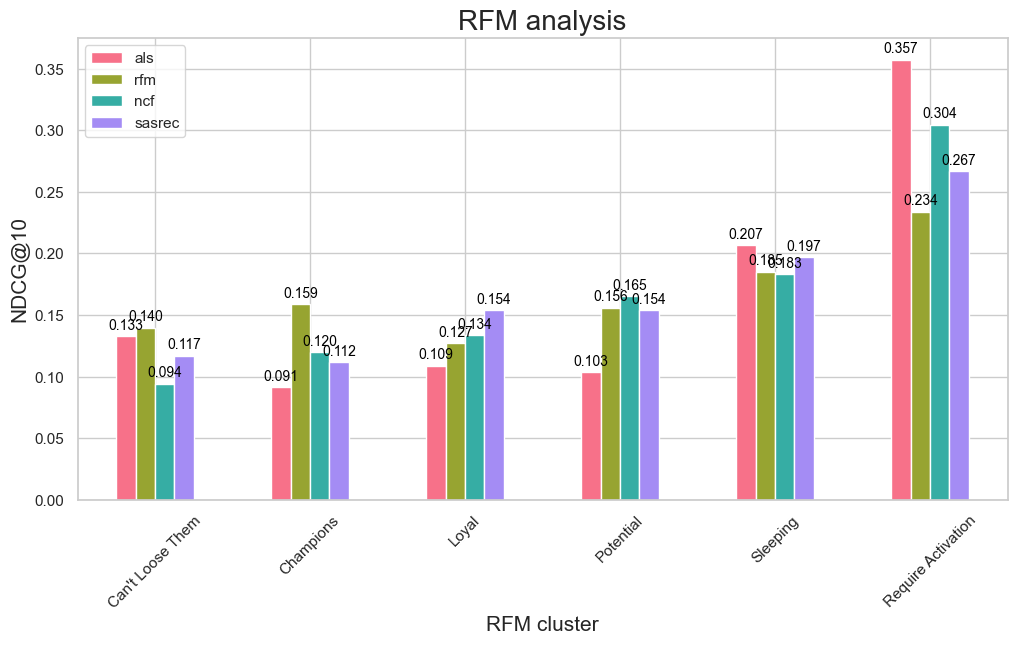

In [339]:
# Set the style for seaborn
sns.set(style='whitegrid')

normalized_df = x.div(x.sum(axis=0), axis=1)
# Create a bar plot with a beautiful color palette
ax = normalized_df.plot.bar(rot=45, figsize=(12, 6), color=sns.color_palette("husl", 4))

# Customize the chart
ax.set_title('RFM analysis', fontsize=20)
ax.set_ylabel('NDCG@10', fontsize=15)
ax.set_xlabel('RFM cluster', fontsize=15)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.3f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='baseline',
        fontsize=10,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Show the plot
plt.show()

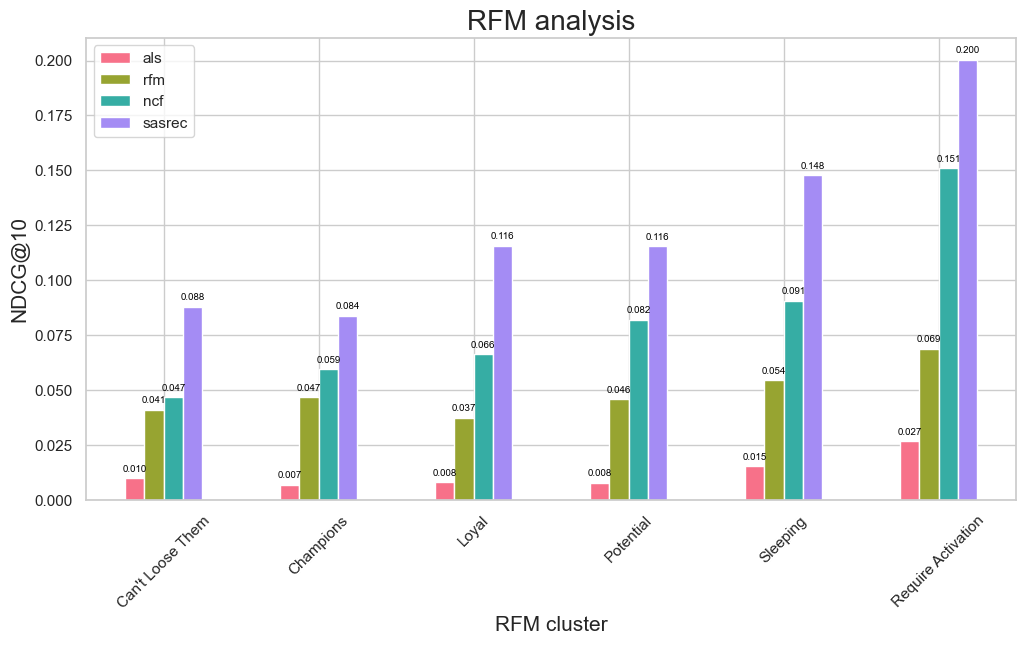

In [340]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Create a bar plot with a beautiful color palette
ax = x.plot.bar(rot=45, figsize=(12, 6), color=sns.color_palette("husl", 4))

# Customize the chart
ax.set_title('RFM analysis', fontsize=20)
ax.set_ylabel('NDCG@10', fontsize=15)
ax.set_xlabel('RFM cluster', fontsize=15)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.3f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='baseline',
        fontsize=7,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Show the plot
plt.show()

In [341]:
rfm = pd.read_parquet('./data/sas/mart/rfm_mapped.parquet')
rfm_levels = ["Can't Loose Them", "Champions", "Loyal", "Potential", "Sleeping", "Require Activation"]

In [342]:
def limit(values, a, b):
    values = values[values > a]
    values = values[values < b]
    return values

In [343]:
rfm['Monetary'].shape

(26212,)

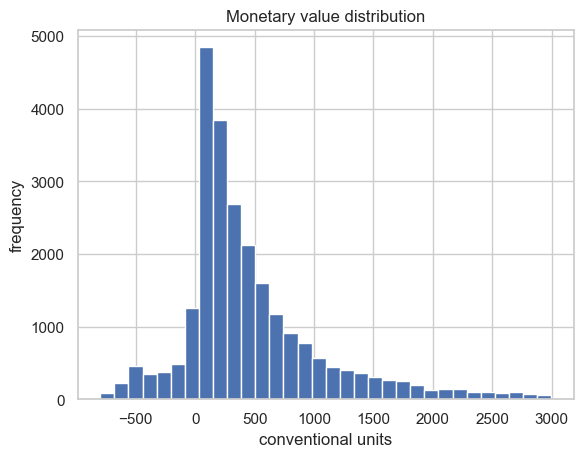

In [242]:
limit(rfm['Monetary'], -800, 3000).hist(bins=32);
plt.title('Monetary value distribution'); plt.xlabel('conventional units'); plt.ylabel('frequency');